In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme();
plt.rcParams["figure.figsize"] = (20,10)

In [130]:
df = pd.read_csv('../data/VivekAithal_glucose_8-19-2021.csv', skiprows=1)
df = df[df['Device']=='FreeStyle Libre 2'].filter(['Device Timestamp','Historic Glucose mg/dL']).dropna()
df.columns = ['time','val']
df['time'] = pd.to_datetime(df['time'])
df['min'] = df['time'].dt.minute
df['hour'] = df['time'].dt.hour
df['t'] = df['hour'] + df['min']/60.0
df['date'] = df['time'].dt.date.astype(str)
df

,time,val,min,hour,t,date
3,2021-08-16 19:33:00,84.0,33,19,19.550000,2021-08-16
4,2021-08-16 19:48:00,83.0,48,19,19.800000,2021-08-16
5,2021-08-16 20:04:00,96.0,4,20,20.066667,2021-08-16
6,2021-08-16 20:19:00,104.0,19,20,20.316667,2021-08-16
7,2021-08-16 20:34:00,98.0,34,20,20.566667,2021-08-16
...,...,...,...,...,...,...
219,2021-08-19 18:42:00,80.0,42,18,18.700000,2021-08-19
220,2021-08-19 18:58:00,82.0,58,18,18.966667,2021-08-19
221,2021-08-19 19:12:00,90.0,12,19,19.200000,2021-08-19
222,2021-08-19 19:27:00,96.0,27,19,19.450000,2021-08-19


[]

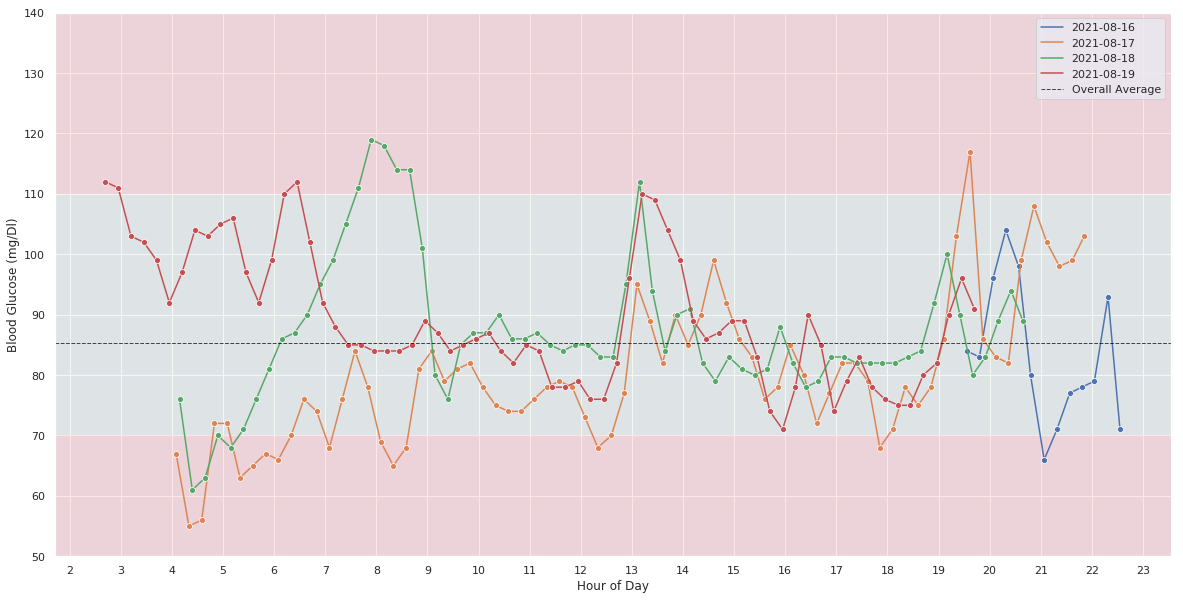

In [131]:
plot = sns.lineplot(data=df, x="t", y="val", hue="date", marker="o")

# plot.axes.axhline(y = 70, color='black', linewidth=1, alpha=.7, ls="--")
# plot.axes.axhline(y = 110, color='black', linewidth=1, alpha=.7, ls="--")
plot.axes.axhspan(50, 70, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhspan(70, 110, facecolor='green', linewidth=0, alpha=.05)
plot.axes.axhspan(110, 140, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhline(y = df['val'].mean(), color='black', linewidth=1, alpha=.7, ls="--", label="Overall Average")

plt.xticks(np.arange(0,24,1))
plt.xlabel("Hour of Day")
plt.ylabel("Blood Glucose (mg/Dl)")
plt.ylim(50,140)
plt.legend()
plt.plot()

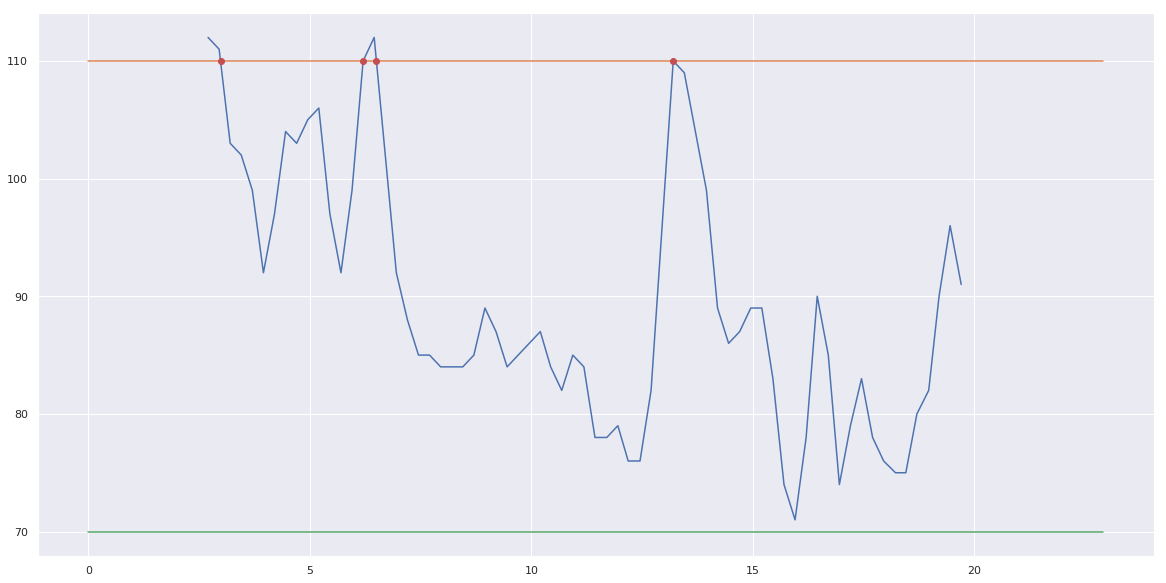

In [158]:
from shapely.geometry import LineString
dt = '2021-08-19'
x = df[df['date']==dt]['t']
y = df[df['date']==dt]['val']

xt = np.arange(0,23,0.1)
yhigh = np.ones_like(x2) * 110
ylow = np.ones_like(x2) * 70



plt.plot(x, y)
plt.plot(xt, yhigh)
plt.plot(xt, ylow)

first_line = LineString(np.column_stack((x, y)))
high_line = LineString(np.column_stack((xt, yhigh)))
low_line = LineString(np.column_stack((xt, ylow)))
intersection1 = first_line.intersection(high_line)
intersection2 = first_line.intersection(low_line)

if intersection1.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection1).xy, 'o')
elif intersection1.geom_type == 'Point':
    plt.plot(*intersection1.xy, 'o')
             
if intersection2.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection2).xy, 'o')
elif intersection2.geom_type == 'Point':
    plt.plot(*intersection2.xy, 'o')
             

        